# Chapter 2 - End to End Machine Learning Project

Welcome to Machine Learning housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/housing/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Take a Quick Look at the Data Structure

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='ocean_proximity'>

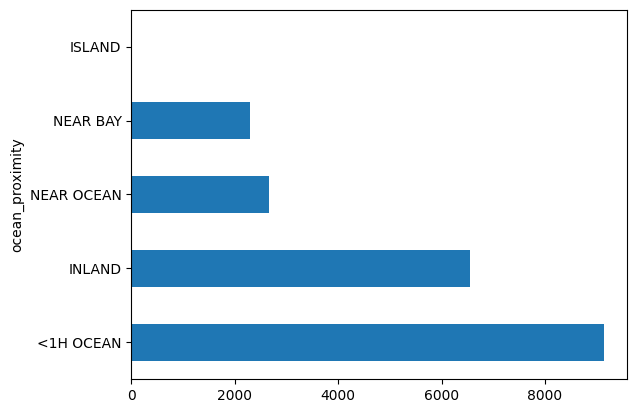

In [5]:
housing["ocean_proximity"].value_counts().plot(kind='barh')

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


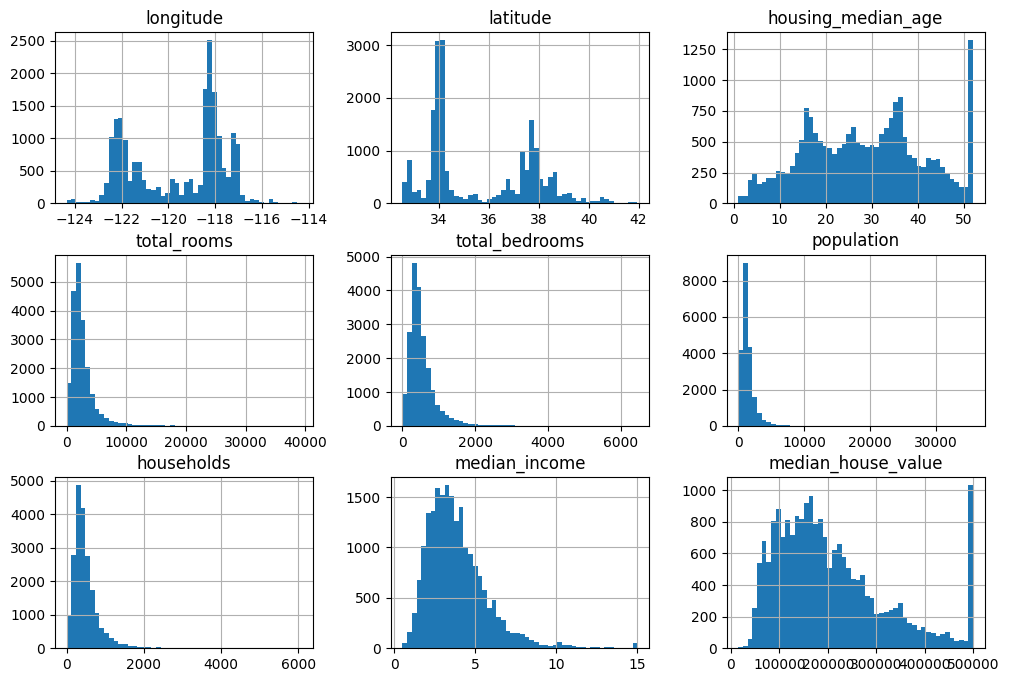

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()

#### Create a categorical feature for median income by binning values of the 'median_income' feature

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

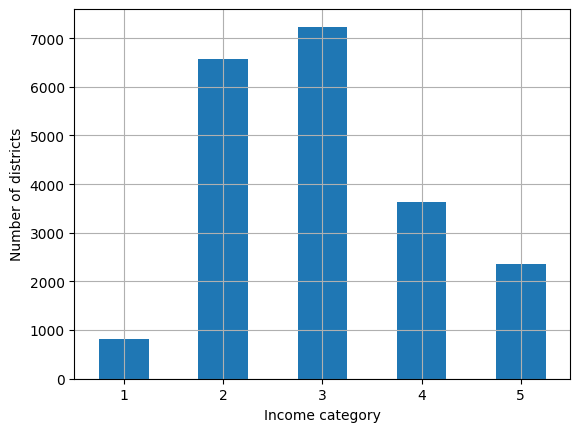

In [9]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### Create our y (target variable) housingframe and X (features) housingframe

In [10]:
y = housing['median_house_value']
X = housing.drop('median_house_value', axis=1)

## Split Dataset

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<Axes: >

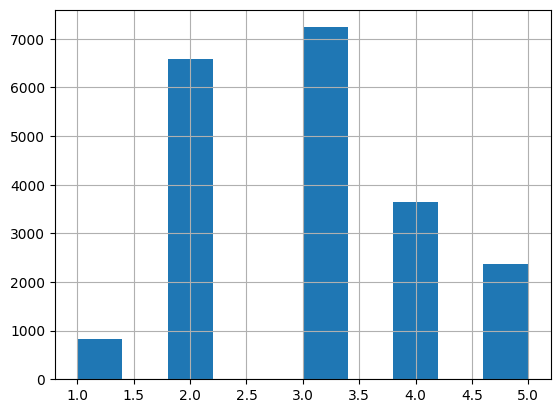

In [12]:
housing['income_cat'].hist()

<Axes: >

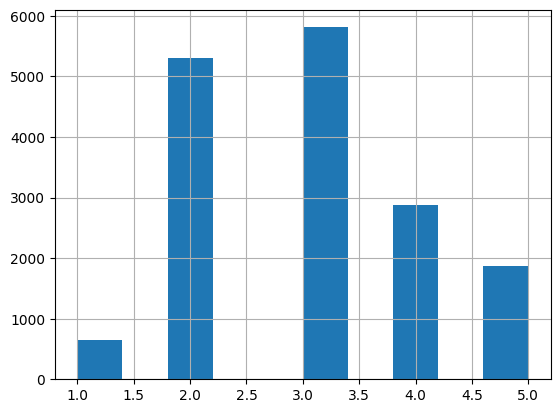

In [13]:
X_train['income_cat'].hist()

### Use *stratified sampling* to ensure the test set is comprised of the correct distributions of different income categories.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

# long way to stratify

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_splits = []
# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     strat_train_set_n = housing.iloc[train_index]
#     strat_test_set_n = housing.iloc[test_index]
#     strat_splits.append([strat_train_set_n,strat_test_set_n])
    
# strat_train, strat_test = strat_splits[0]

In [15]:
# short way to stratify
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
housing["income_cat"].value_counts() / len(housing["income_cat"])

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Drop "income_cat" because it is not needed anymore. It was only used to make sure test housing and train housing had same distributions of an individuals income.

In [18]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

## Exploratory Data Analysis

In [19]:
housing_ = strat_train_set.copy()

### Histograms

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

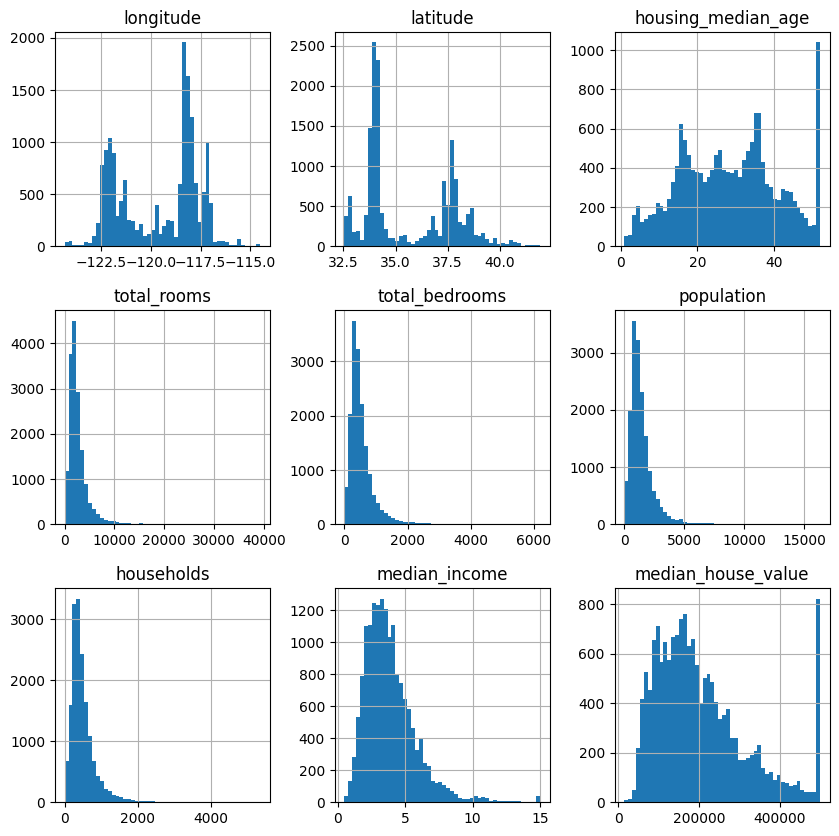

In [20]:
housing_.hist(bins=50, figsize=(10,10))

<Axes: >

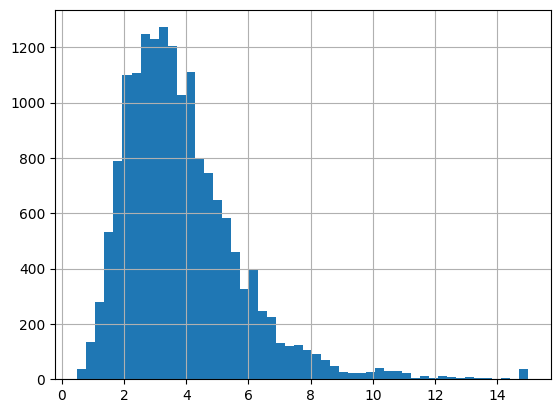

In [21]:
housing_['median_income'].hist(bins=50)

### Visualizing Geographical housing

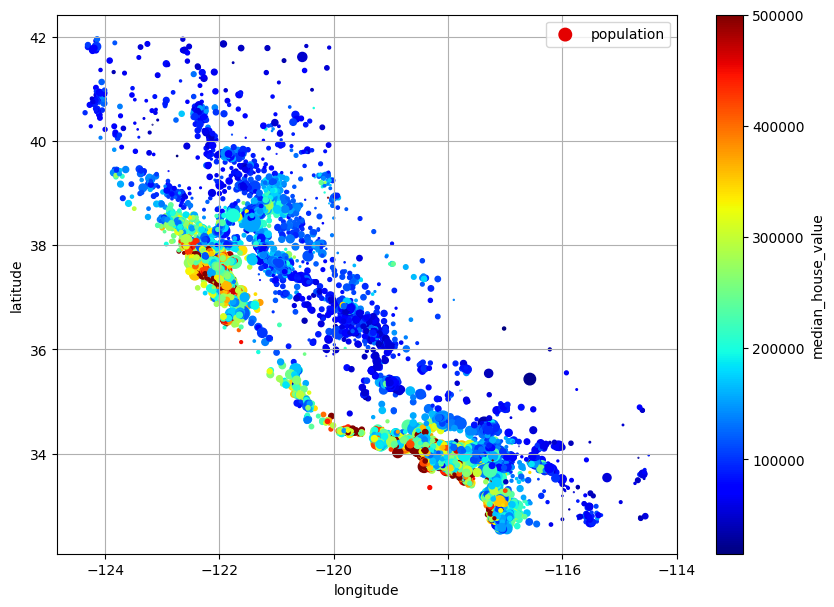

In [22]:
# California housing prices: red is expensive, blue is cheap, larger circles indicate areas with larger poplation

housing_.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing_["population"] / 100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend="True", sharex=False, figsize=(10,7))
plt.show()


### Correlation Matrices

In [23]:
corr_matrix = housing_.corr(numeric_only=True)

[Text(0.5, 0, 'longitude'),
 Text(1.5, 0, 'latitude'),
 Text(2.5, 0, 'housing_median_age'),
 Text(3.5, 0, 'total_rooms'),
 Text(4.5, 0, 'total_bedrooms'),
 Text(5.5, 0, 'population'),
 Text(6.5, 0, 'households'),
 Text(7.5, 0, 'median_income'),
 Text(8.5, 0, 'median_house_value')]

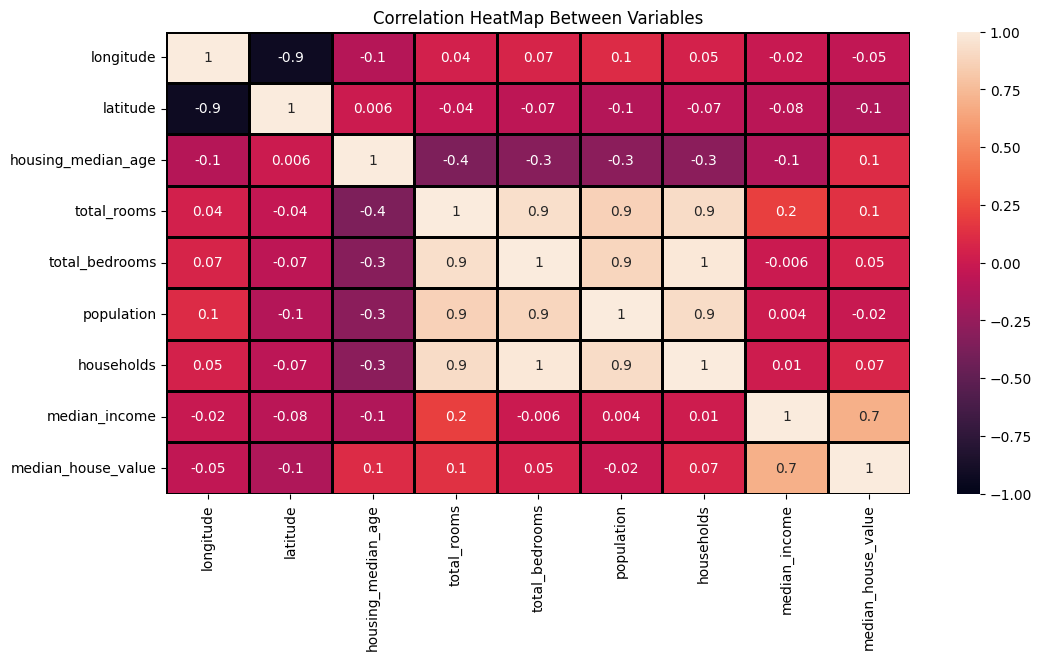

In [24]:
import seaborn as sns

plt.figure(figsize=(12,6))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='0.1g', vmin= -1, vmax= 1, center= 0, cmap= 'rocket', linewidths= 1, linecolor= 'black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

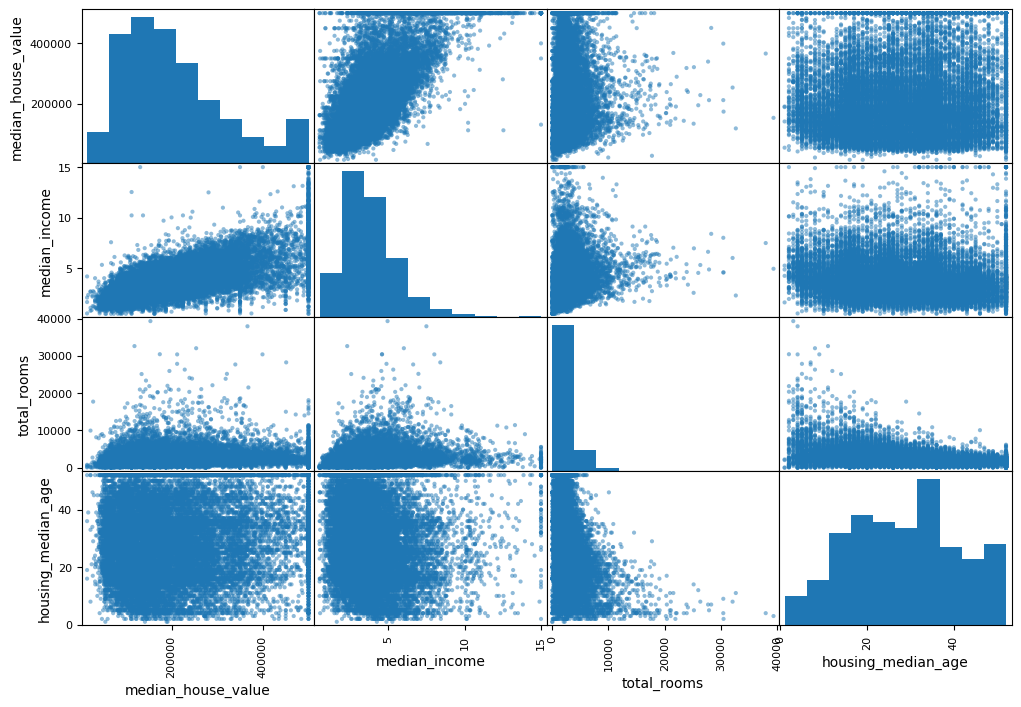

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

## Prepare Data for Machine Learning

For this data, we will be applying the following trasnformations:
- **Feature Engineering**: Creating new features out of our raw data using domain knowledge
- **Imputation**: Inserting values where they might be missing to have a complete dataset
- **Encoding Categorical Variables**: Transforming categorical variables into some numerical variation
- **Scaling**: Applying a scaler that transforms all of our data on the same numerical scale


In [27]:
housing_ = strat_train_set.drop('median_house_value', axis=1)

housing_labels = strat_train_set['median_house_value'].copy()

### Dealing with missing values

In [28]:
housing_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Since there are missing values in the 'total_bedrooms' column, we will impute them with the median value.

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [30]:
housing_numerical = housing_.select_dtypes(include=[np.number])
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [31]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [32]:
X = imputer.transform(housing_numerical)

housing_tr = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


### Encode categorical variables

In [33]:
housing_cat = housing_[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)

# Creates a dense array meaning that all instances have a value not just the ones that are encoded
housing_cat_onehot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### Feature Engineering

In [35]:
def feature_engineering(data):
    data["rooms_per_house"] = data["total_rooms"] / data["households"]
    data["bedrooms_per_house"] = data["total_bedrooms"] / data["total_rooms"]
    data["population_per_house"] = data["population"] / data["households"]

    return data

In [36]:
housing_feature_engineered = feature_engineering(housing_numerical)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,population_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,4.511933,0.230891,2.058473


### Scaling our Data
Many machine learning algorithms do not work well with unscaled data. For example, the magnitude of values in the 'total_rooms' feature is going to be substantially higher than that in the 'median_income' feature because the median_income is scaled down by 1000. We will use the StandardScaler which will scale our values to their z-score within their column like so:

z = (x-u) / s

Where x is the column we are scaling, u is the mean of the column, and s is the standard deviation


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ..., -0.86602737,
         2.14135179, -0.33020372],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.0245495 ,
        -0.56854491, -0.25361631],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.04119332,
        -0.21643202, -0.05104091],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ..., -0.10998748,
        -0.26285278,  0.15854151],
       [ 0.58639727, -0.73960483,  0.66925745, ..., -0.36093745,
         0.3151675 , -0.21033248],
       [-1.41803793,  0.94797769,  1.22545939, ..., -1.32397227,
         4.1738051 ,  0.04958379]])

### Pipelines

Pipelines are a feature built in to sklearn that allow us to easily apply a number of transformations one after another. For this example, we will create our own pipeline using a funciton. 

In [38]:
housing_ = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

def data_transformations(data):

    ### Separate labels if they exist ###

    if 'median_house_value' in data.columns:
        labels = data['median_house_value']
        data = data.drop('median_house_value', axis=1)

    else:
        labels=None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    # Creating a list of our features for future use
    features = list(feature_engineered_data.columns)
    
    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    
    housing_numerical = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_numerical)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse_output=False)
    housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove('ocean_proximity') # we encoded this feature so we can remove it

    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatenating all Data ###
    output = np.hstack([housing_scaled, housing_cat_onehot])

    return output, labels, features


## Select and Train Model

In [39]:
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [40]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_house',
 'bedrooms_per_house',
 'population_per_house',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [41]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[-1.18804209,  0.69962912, -0.62700415, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76723335, -0.8005624 ,  0.56519904, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68286868, -0.8704471 ,  0.08831777, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.71408066,  1.42642999,  0.32675841, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22774311,  0.92791914, -0.38856351, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.20890725, -1.33634509,  1.83688246, ...,  0.        ,
         0.        ,  1.        ]])

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data, train_labels)

LinearRegression()

In [43]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={'Original Values': original_values, 'Predicted Values': predicted_values})

comparison_dataframe['Differences'] = comparison_dataframe['Original Values'] - comparison_dataframe['Predicted Values']

comparison_dataframe

,Original Values,Predicted Values,Differences
3905,397700.0,379131.613334,18568.386666
16821,202900.0,238783.993669,-35883.993669
2900,310000.0,375086.841602,-65086.841602
7193,314300.0,273187.551326,41112.448674
13928,187500.0,245333.858610,-57833.858610


In [44]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(46698.46158586328)

In [45]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

np.float64(43697.10584424626)

### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_reg  = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [47]:
tree_train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, tree_train_predictions)
tree_rsme = np.sqrt(tree_mse)
tree_rsme

np.float64(0.0)

### Cross Validation

Instead of just splitting our data into a train and test set and training once, we can use K-Fold Cross Validation which will split our training dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evalute the model.

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring='neg_mean_squared_error', cv=10)

tree_rsme_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

display_scores(tree_rsme_scores)

Scores: [69035.50316425 66440.32489444 67557.90097875 71163.42519558
 69144.71851684 71789.84980983 70507.09898267 73433.47483902
 68938.79789986 69692.31655092]
Mean: 69770.3410832157
Standard deviation: 1938.899204338071


### Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [51]:
forest_train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, forest_train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18496.958508268486)

In [52]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48611.55960958 49938.30014032 47650.26034523 50190.08014244
 48820.79505168 49771.64120943 50118.62959234 51351.60701092
 49984.37621715 49453.77063125]
Mean: 49589.10199503537
Standard deviation: 968.6488505490478


### Fine-Tuning the Model
After you pick a model or a set of models that are promising, you will need to fine-tine the hyperparameters (parameters of the model that are not affected by training) in order to find the best ones to use for your model. You can use something called Grid Search in order to accomplish this.

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [56]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63401.40256962521 {'max_features': 2, 'n_estimators': 3}
55061.85694915813 {'max_features': 2, 'n_estimators': 10}
52804.167390423 {'max_features': 2, 'n_estimators': 30}
60893.30534693778 {'max_features': 4, 'n_estimators': 3}
52575.90039819886 {'max_features': 4, 'n_estimators': 10}
49883.90326556222 {'max_features': 4, 'n_estimators': 30}
58480.539787980335 {'max_features': 6, 'n_estimators': 3}
51282.99884780795 {'max_features': 6, 'n_estimators': 10}
49668.77506213067 {'max_features': 6, 'n_estimators': 30}
58175.08517207165 {'max_features': 8, 'n_estimators': 3}
51708.359484147484 {'max_features': 8, 'n_estimators': 10}
49651.33724813071 {'max_features': 8, 'n_estimators': 30}
61919.04879958446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53923.2970425073 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58336.44280710227 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51804.84469495147 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [57]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059713,0.003044,0.003401,0.000491,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.941142e+09,-3.853535e+09,...,-4.019738e+09,1.926544e+08,18,-1.038962e+09,-1.031828e+09,-1.106597e+09,-1.066614e+09,-1.114927e+09,-1.071786e+09,3.398163e+07
1,0.214222,0.034083,0.008178,0.001802,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.043324e+09,-2.883917e+09,...,-3.031808e+09,9.563507e+07,11,-5.740348e+08,-5.671689e+08,-5.797099e+08,-5.739315e+08,-5.570769e+08,-5.703844e+08,7.749846e+06
2,0.580017,0.006745,0.020656,0.000458,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.777721e+09,-2.669705e+09,...,-2.788280e+09,8.726423e+07,9,-4.336377e+08,-4.197996e+08,-4.342897e+08,-4.317571e+08,-4.194250e+08,-4.277818e+08,6.723079e+06
3,0.098907,0.004263,0.002959,0.000567,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.721285e+09,-3.601338e+09,...,-3.707995e+09,9.872414e+07,16,-9.462426e+08,-9.738772e+08,-9.568481e+08,-9.590690e+08,-9.341320e+08,-9.540338e+08,1.329524e+07
4,0.310064,0.004770,0.007350,0.000524,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.765151e+09,-2.650604e+09,...,-2.764225e+09,9.340872e+07,8,-5.115646e+08,-5.078163e+08,-5.077026e+08,-4.922489e+08,-5.045336e+08,-5.047732e+08,6.646490e+06
5,0.962617,0.021054,0.018606,0.000627,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.466210e+09,-2.367622e+09,...,-2.488404e+09,9.204687e+07,3,-3.884878e+08,-3.917665e+08,-3.823036e+08,-3.795319e+08,-3.883336e+08,-3.860847e+08,4.479976e+06
6,0.134076,0.006709,0.002401,0.000490,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.566828e+09,-3.330191e+09,...,-3.419974e+09,1.236428e+08,14,-8.658837e+08,-8.814660e+08,-9.062972e+08,-8.899383e+08,-8.679153e+08,-8.823001e+08,1.490852e+07
7,0.445887,0.026129,0.006698,0.000402,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.702796e+09,-2.570198e+09,...,-2.629946e+09,6.567455e+07,4,-4.846924e+08,-4.865403e+08,-4.816188e+08,-4.845969e+08,-4.738518e+08,-4.822600e+08,4.490160e+06
8,1.374421,0.024640,0.018871,0.000665,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.508332e+09,-2.410490e+09,...,-2.466987e+09,4.592905e+07,2,-3.738213e+08,-3.830779e+08,-3.780722e+08,-3.717696e+08,-3.701612e+08,-3.753804e+08,4.673457e+06
9,0.179128,0.008724,0.002802,0.000400,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.228042e+09,-3.376485e+09,...,-3.384341e+09,1.206602e+08,12,-8.285496e+08,-8.602644e+08,-8.324401e+08,-8.561593e+08,-8.767668e+08,-8.508361e+08,1.802628e+07


### Randomized Search

Randomized search allows you to more easily find the hyperparameters that we're interested in because instead of searching through all possible combinations, it randomly picks a couple and tries them out. 

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(forest_reg,param_distributions=param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rand_search.fit(train_data, train_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002322C8E60F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002322C8E7170>},
                   random_state=42, scoring='neg_mean_squared_error')

In [61]:
cv_res_rand = rand_search.cv_results_
for mean_score, params in zip(cv_res_rand["mean_test_score"], cv_res_rand["params"]):
    print(np.sqrt(-mean_score), params)

48782.518712890735 {'max_features': 7, 'n_estimators': 180}
51380.19727504941 {'max_features': 5, 'n_estimators': 15}
49970.55780478898 {'max_features': 3, 'n_estimators': 72}
50327.18643879651 {'max_features': 5, 'n_estimators': 21}
48877.639635844076 {'max_features': 7, 'n_estimators': 122}
49982.89983997319 {'max_features': 3, 'n_estimators': 75}
49873.20687379391 {'max_features': 3, 'n_estimators': 88}
49223.071844891085 {'max_features': 5, 'n_estimators': 100}
49836.95969286898 {'max_features': 3, 'n_estimators': 150}
64128.32202984528 {'max_features': 5, 'n_estimators': 2}


In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.87074301e-02, 6.13310493e-02, 4.16064875e-02, 1.53129223e-02,
       1.51843151e-02, 1.48897498e-02, 1.40696549e-02, 3.67065359e-01,
       5.55535679e-02, 5.38130908e-02, 1.11866365e-01, 6.60225789e-03,
       1.67991508e-01, 1.57030330e-04, 2.20084145e-03, 3.64837027e-03])

### Feature Importance list

Judging the importance of various features is important as this allows us to explain to our stakeholders which feature is most important and why which is becoming more important as more advanced models behave like black boxes.

In [63]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.06870743008700772),
 ('latitude', 0.061331049337012646),
 ('housing_median_age', 0.04160648752985905),
 ('total_rooms', 0.015312922282988937),
 ('total_bedrooms', 0.01518431513657519),
 ('population', 0.014889749775754905),
 ('households', 0.014069654880939912),
 ('median_income', 0.36706535946446933),
 ('rooms_per_house', 0.055553567878882576),
 ('bedrooms_per_house', 0.053813090784175954),
 ('population_per_house', 0.11186636454930896),
 ('<1H OCEAN', 0.006602257890131061),
 ('INLAND', 0.16799150835039767),
 ('ISLAND', 0.00015703033046054728),
 ('NEAR BAY', 0.0022008414512276627),
 ('NEAR OCEAN', 0.0036483702708079223)]

<BarContainer object of 16 artists>

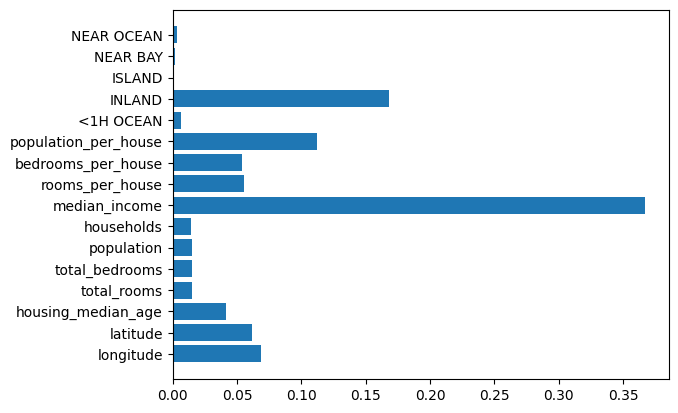

In [64]:
plt.barh(y=features, width=feature_importances.tolist())

In [66]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(58901.992168919896)